In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = Path('.')

In [4]:
#data_lm = TextLMDataBunch.from_csv(path, 'Sarcasm_Headlines_Dataset.csv')
#data_clas = TextClasDataBunch.from_csv(path, 'Sarcasm_Headlines_Dataset.csv', vocab=data_lm.train_ds.vocab, bs=32)

In [5]:
#data_lm.save('data_lm_export.pkl')
#data_clas.save('data_clas_export.pkl')

In [6]:
data_lm = load_data(path, fname='data_lm_export.pkl')
data_clas = load_data(path, fname='data_clas_export.pkl', bs=16)

In [7]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-02


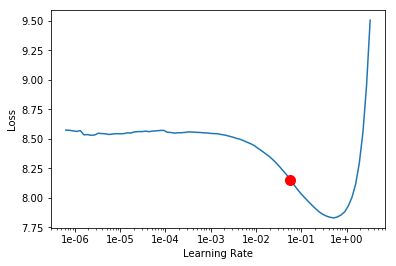

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,6.864359,5.994965,0.180729


In [11]:
learn.save('fit_head')

In [12]:
learn.load('fit_head');

In [13]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,6.010361,5.951285,0.184583
2,5.911107,5.837480,0.192381
3,5.732841,5.727976,0.201220
4,5.515776,5.654706,0.206443
5,5.299534,5.621362,0.210551
6,5.109719,5.598558,0.211771
7,4.945081,5.591376,0.213318
8,4.816393,5.586998,0.214435
9,4.723852,5.585927,0.214420
10,4.679412,5.585788,0.215104


In [14]:
learn.save('fine_tuned')

In [15]:
learn.load('fine_tuned');

In [16]:
learn.save_encoder('fine_tuned_enc')

In [17]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [18]:
learn.load_encoder('fine_tuned_enc')

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-02


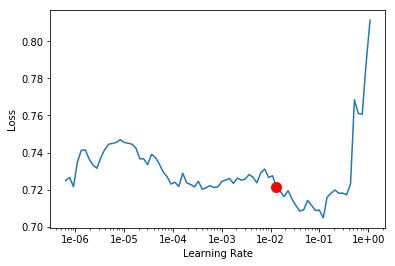

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.584305,0.501052,0.747847
2,0.556174,0.465709,0.777424


In [22]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(5e-3/2., 5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.487109,0.386476,0.833770
2,0.429776,0.343487,0.853987


In [23]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.420157,0.319929,0.862411
2,0.392111,0.308786,0.869712
3,0.330938,0.291744,0.880008
4,0.342987,0.284330,0.881879
5,0.369188,0.288921,0.881505
